<a href="https://colab.research.google.com/github/shohail07/roof/blob/master/salarypredictionwithwebdeployfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings;
warnings.simplefilter('ignore')

## **Loading Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/survey_results_public.csv")

In [ ]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## **Data Validation - Total Cells vs Missing %**

In [ ]:
#Finding % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total cell: ', total_cells)
print('Total missing values: ', total_missing)
print('Missing: ', missing_percent, '%')

Total cell:  7491456
Total missing values:  2516072
Missing:  33.58588770994584 %


In [ ]:
df.shape

(89184, 84)

## **Data Preprocessing Starts**

In [ ]:
df = df[["Country", "EdLevel", "Employment", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,Employment,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",4,23456.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   EdLevel       87973 non-null  object 
 2   Employment    87898 non-null  object 
 3   YearsCodePro  66136 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [ ]:
df['EdLevel'].value_counts()

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",20543
Some college/university study without earning a degree,11753
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",8897
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3887
"Associate degree (A.A., A.S., etc.)",2807
Primary/elementary school,1905
Something else,1475


In [ ]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,Employment,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",4,23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,"Employed, full-time",21,96828.0


In [ ]:
df.shape

(34348, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   Employment    48007 non-null  object 
 3   YearsCodePro  47825 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Country,0
EdLevel,0
Employment,0
YearsCodePro,0
Salary,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   Employment    47813 non-null  object 
 3   YearsCodePro  47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [ ]:
df['Country'].value_counts()


,count
Country,
United States of America,11846
Germany,3947
United Kingdom of Great Britain and Northern Ireland,3521
Canada,2095
India,1849
...,...
Guinea-Bissau,1
Mauritania,1
Botswana,1


In [ ]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [ ]:
country_map = shorten_categories(df.Country.value_counts(), 200)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

,count
Country,
United States of America,11846
Other,4848
Germany,3947
United Kingdom of Great Britain and Northern Ireland,3521
Canada,2095
India,1849
France,1793
Netherlands,1359
Poland,1265


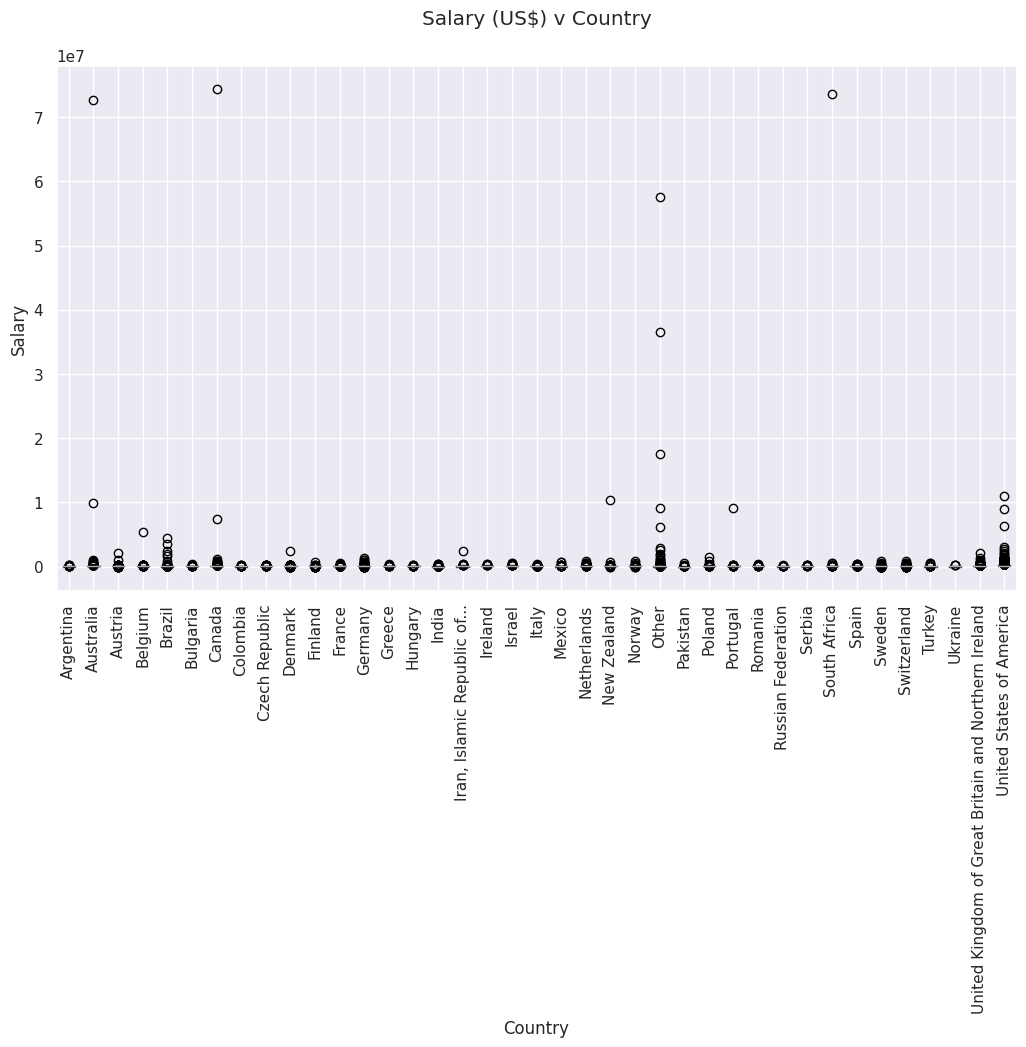

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   Employment    47813 non-null  object 
 3   YearsCodePro  47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [ ]:
df = df[df["Salary"] <= 150000]
df = df[df["Salary"] >= 5000]
df = df[df['Country'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34348 entries, 5 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34348 non-null  object 
 1   EdLevel       34348 non-null  object 
 2   Employment    34348 non-null  object 
 3   YearsCodePro  34348 non-null  object 
 4   Salary        34348 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


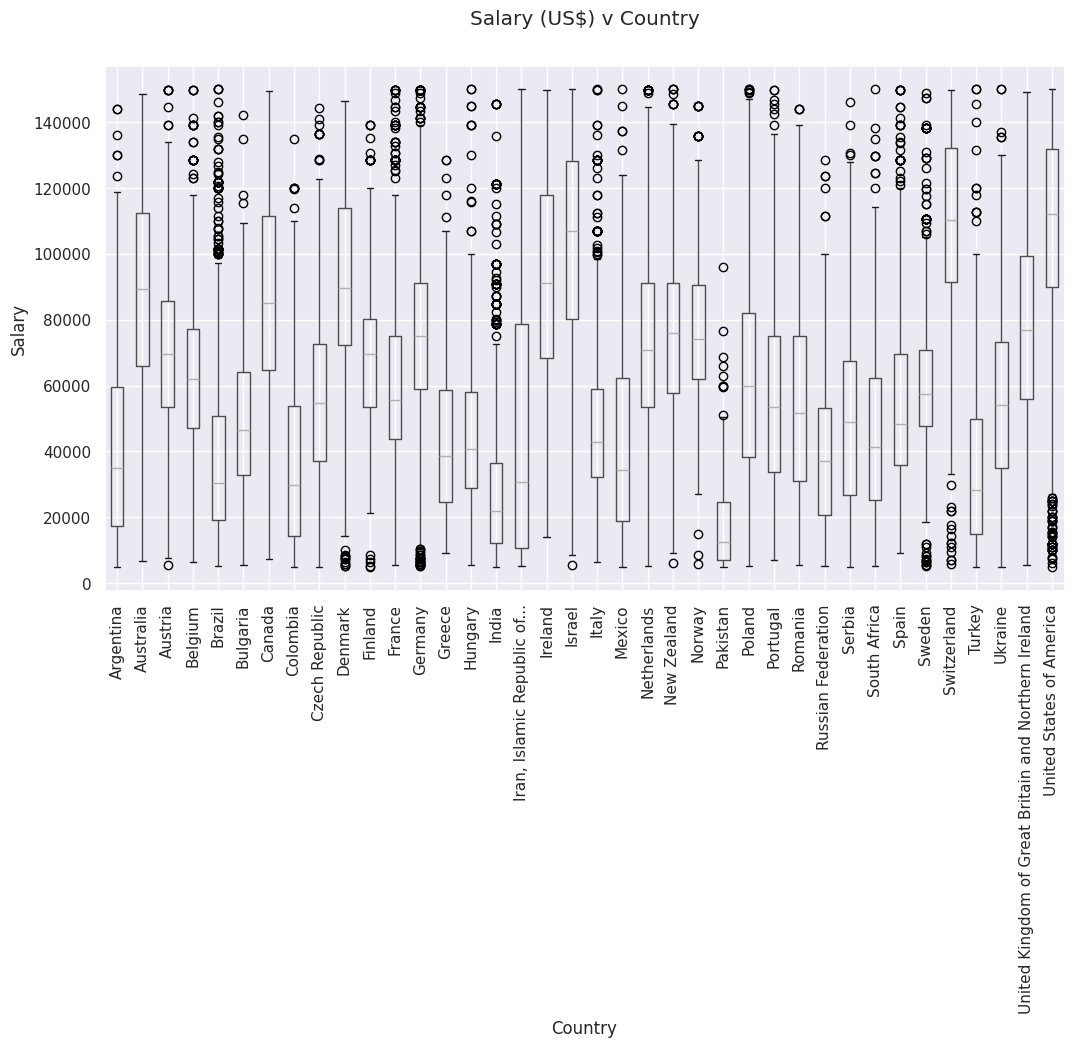

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["YearsCodePro"].unique()

array(['21', '3', '15', '9', 'Less than 1 year', '10', '2', '6', '14',
       '5', '7', '13', '28', '30', '4', '8', '24', '25', '23', '12', '16',
       '11', '18', '20', '19', '17', '26', '1', '38', '33', '29', '22',
       '27', '31', '34', '32', '37', '42', '39', '36', '35', '40', '41',
       '44', '48', '45', '50', '43', '46', 'More than 50 years', '47',
       '49'], dtype=object)

In [ ]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [ ]:
df["YearsCodePro"].unique()

array([21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,  7. ,
       13. , 28. , 30. ,  4. ,  8. , 24. , 25. , 23. , 12. , 16. , 11. ,
       18. , 20. , 19. , 17. , 26. ,  1. , 38. , 33. , 29. , 22. , 27. ,
       31. , 34. , 32. , 37. , 42. , 39. , 36. , 35. , 40. , 41. , 44. ,
       48. , 45. , 50. , 43. , 46. , 47. , 49. ])

In [ ]:
df["EdLevel"].unique()

array(['Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [ ]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [ ]:
df["EdLevel"].unique()

array(['Less than a Bachelors', 'Bachelor’s degree', 'Master’s degree',
       'Post grad'], dtype=object)

In [ ]:
df["Employment"].unique()

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [ ]:
def clean_employment(x):
    if 'Employed full-time' in x:
        return 'Full time'
    if 'Employed part-time' in x:
        return 'Part time'
    if 'Independent contractor, freelancer, or self-employed' in x:
        return 'No employment'
    return 'No employment'

df['Employment'] = df['Employment'].apply(clean_employment)

In [ ]:
df["Employment"].unique()

array(['No employment'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34348 entries, 5 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34348 non-null  object 
 1   EdLevel       34348 non-null  object 
 2   Employment    34348 non-null  object 
 3   YearsCodePro  34348 non-null  float64
 4   Salary        34348 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.6+ MB


## **Data Analysis Part**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style using sns.set_theme()
sns.set_theme(style="darkgrid")

# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

Text(0.5, 1.0, 'Education label vs Salary')

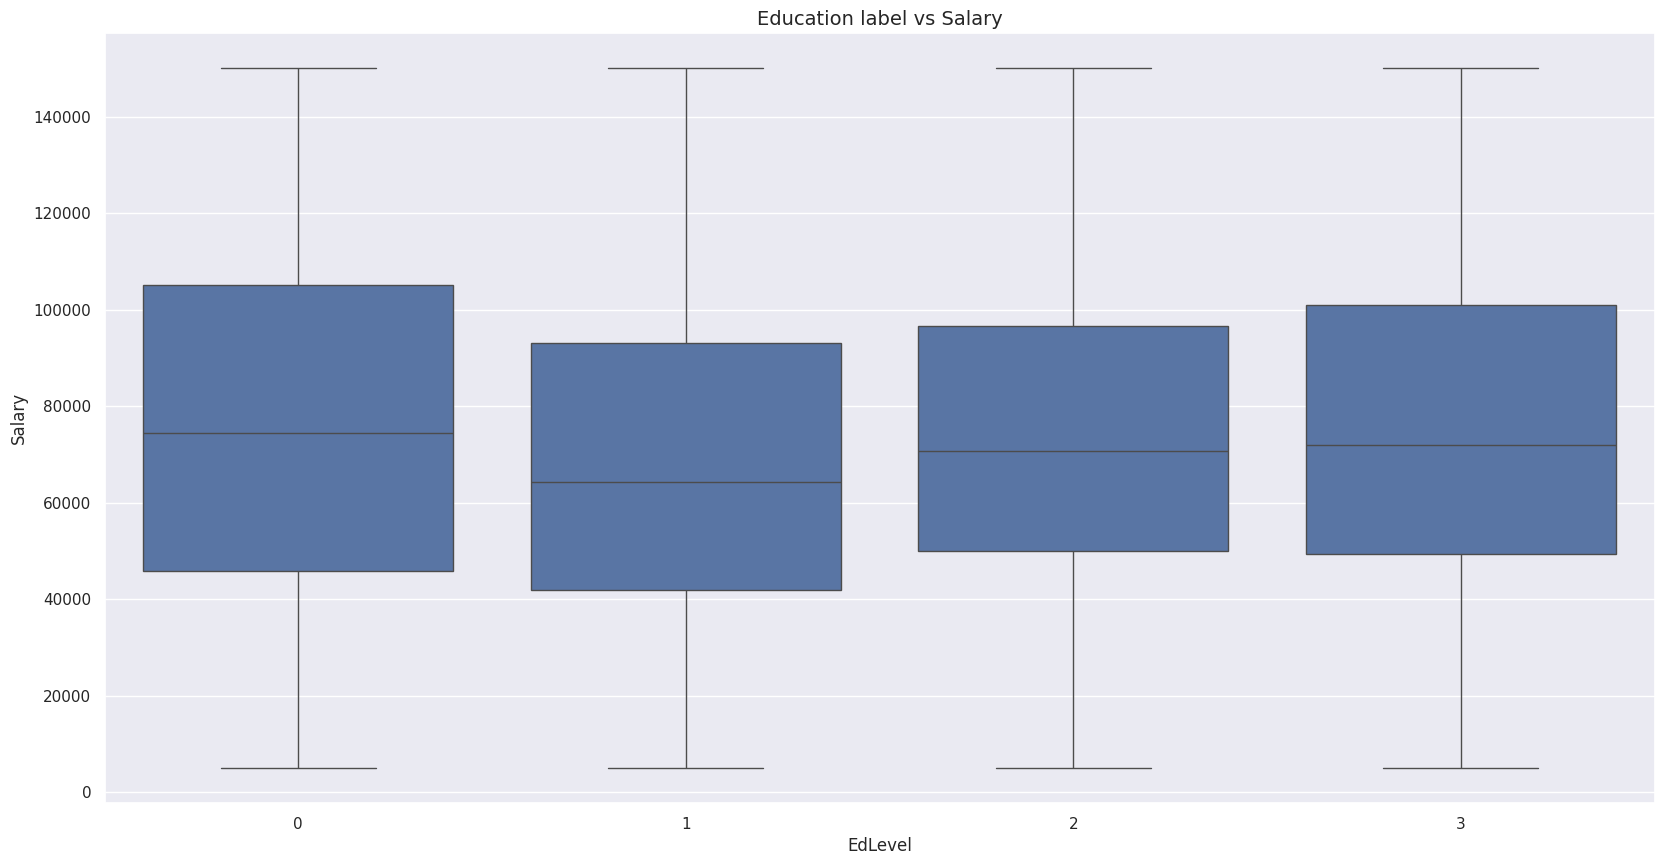

In [ ]:
sns.boxplot(x ='EdLevel', y='Salary', data=df)
plt.title('Education label vs Salary', fontsize = 14)

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,10)

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Text(0.5, 1.0, 'Employment vs Salary')

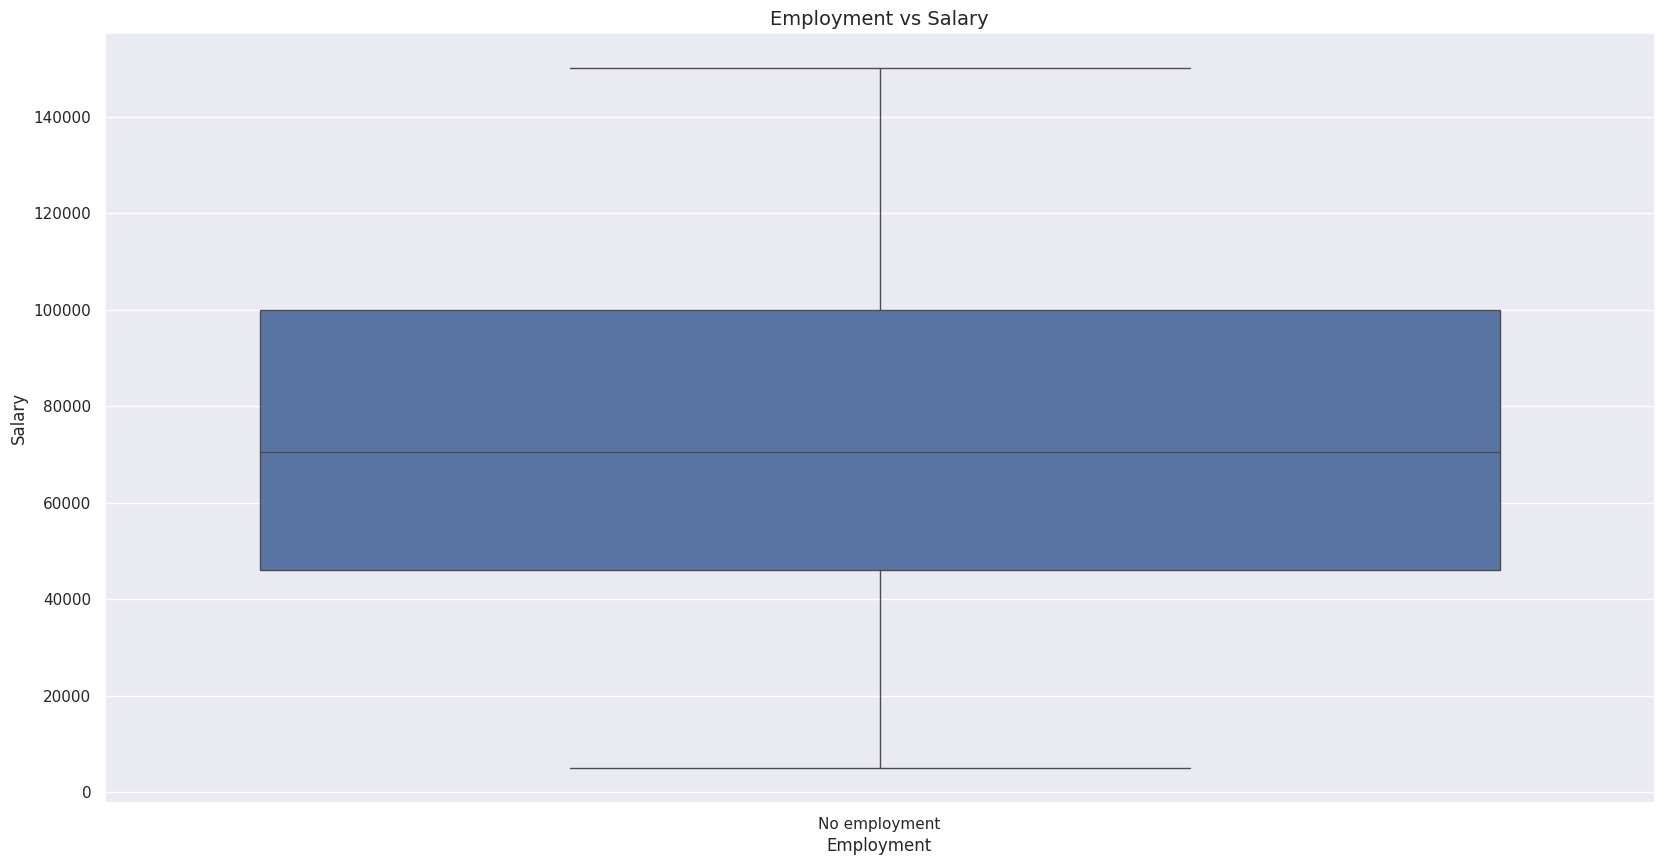

In [ ]:
sns.boxplot(x ='Employment', y='Salary', data=df)
plt.title('Employment vs Salary', fontsize = 14)

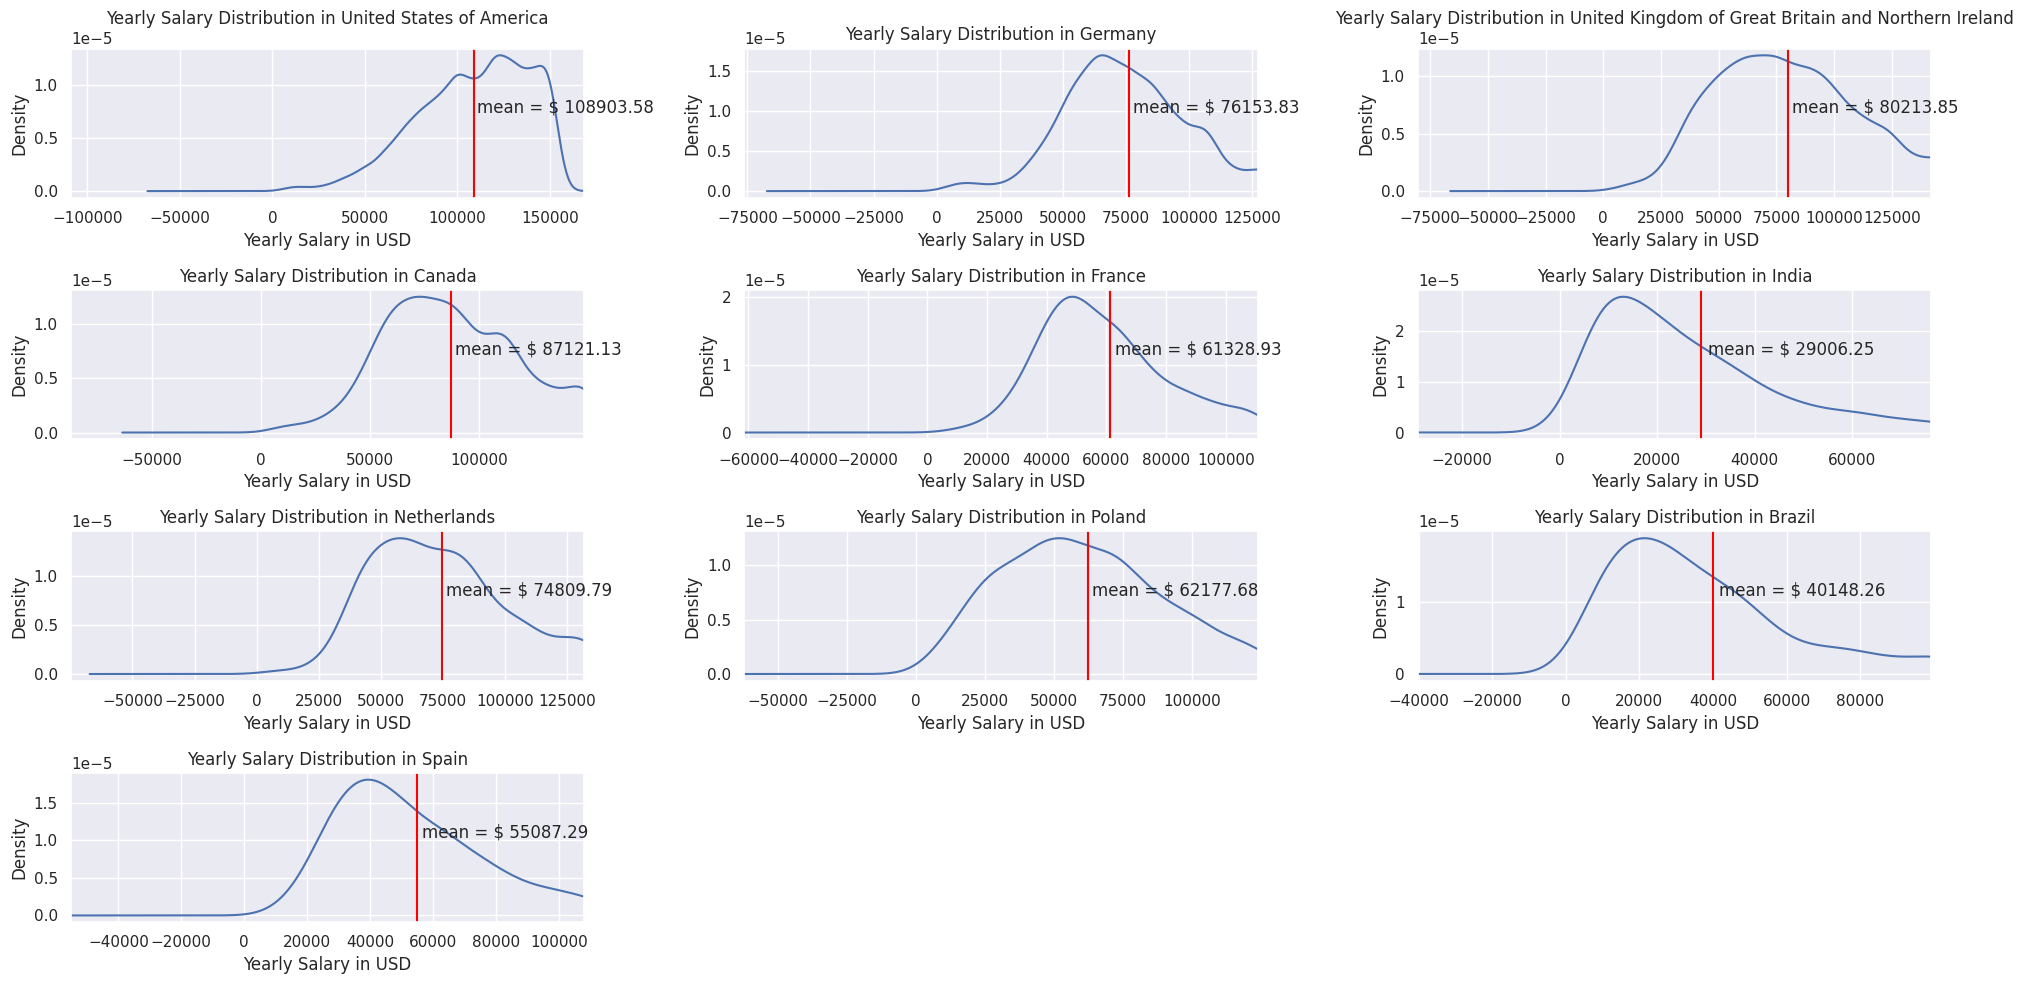

In [ ]:
fig = plt.figure(figsize = (20, 10))

countries = df['Country'].value_counts().sort_values(ascending = False)[:10].index.tolist()

for i, country in enumerate(countries):
    plt.subplot(4, 3, i + 1)
    temp_salaries = df.loc[df['Country'] == country, 'Salary']

    ax = temp_salaries.plot(kind = 'kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1]) * 0.55), 'mean = $ ' + str(round(temp_salaries.mean(),2)), fontsize = 12)
    ax.set_xlabel('Yearly Salary in USD')
    ax.set_xlim(-temp_salaries.mean(), temp_salaries.mean() + 2 * temp_salaries.std())
    ax.set_title('Yearly Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.show()

## **label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([1, 0, 2, 3])

In [ ]:
le_employment = LabelEncoder()
df['Employment'] = le_employment.fit_transform(df['Employment'])
df["Employment"].unique()

array([0])

In [ ]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([36, 37, 10,  1, 12, 32, 11, 31, 30,  4, 26, 19,  6,  0, 33, 29, 21,
       15, 13,  2, 23, 28, 25, 16,  3,  9, 34, 14, 18, 35, 17,  8, 27, 24,
       22,  5,  7, 20])

In [ ]:
df.shape

(34348, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34348 entries, 5 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34348 non-null  int64  
 1   EdLevel       34348 non-null  int64  
 2   Employment    34348 non-null  int64  
 3   YearsCodePro  34348 non-null  float64
 4   Salary        34348 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.6 MB


In [ ]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [ ]:
X.head()

,Country,EdLevel,Employment,YearsCodePro
5,36,1,0,21.0
6,37,1,0,3.0
7,37,0,0,3.0
8,10,2,0,15.0
11,1,0,0,9.0


In [ ]:
y.head()

,Salary
5,96828.0
6,135000.0
7,80000.0
8,64254.0
11,78003.0


## **Data Splitting in Train and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 120)

In [ ]:
print(len(X_train), len(X_test))

24043 10305


In [ ]:
print(len(y_train), len(y_test))

24043 10305


## **Feature Selection**

In [ ]:
corr = X_train.corr()
corr

,Country,EdLevel,Employment,YearsCodePro
Country,1.000000,-0.092717,NaN,0.022003
EdLevel,-0.092717,1.000000,NaN,0.090608
Employment,NaN,NaN,NaN,NaN
YearsCodePro,0.022003,0.090608,NaN,1.000000


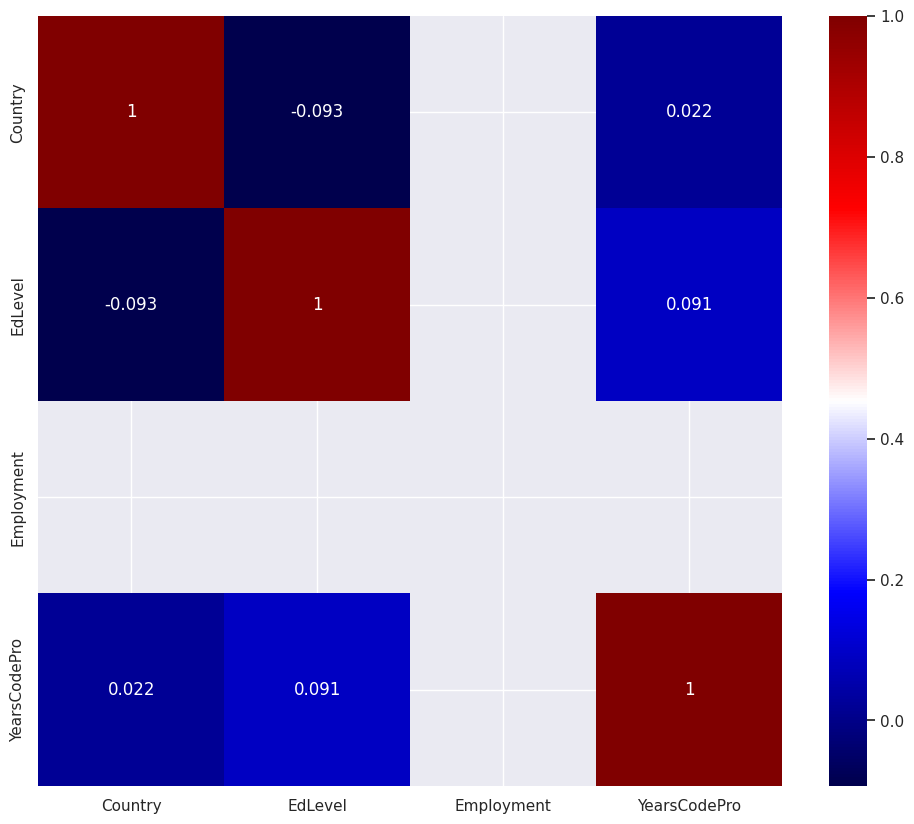

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

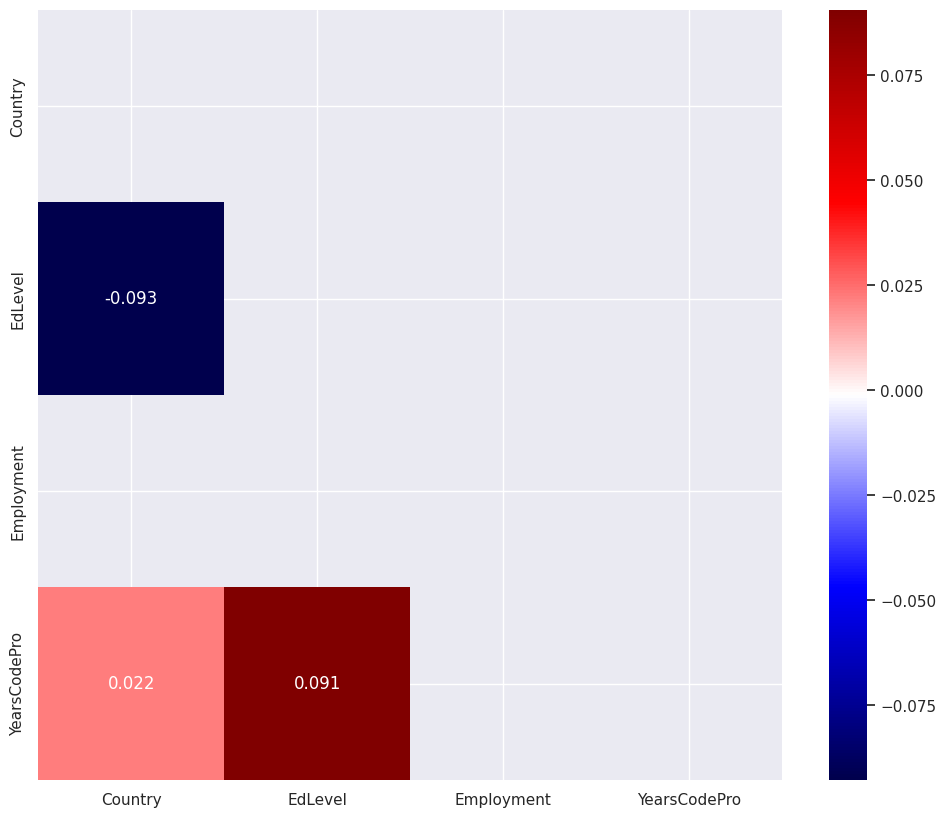

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

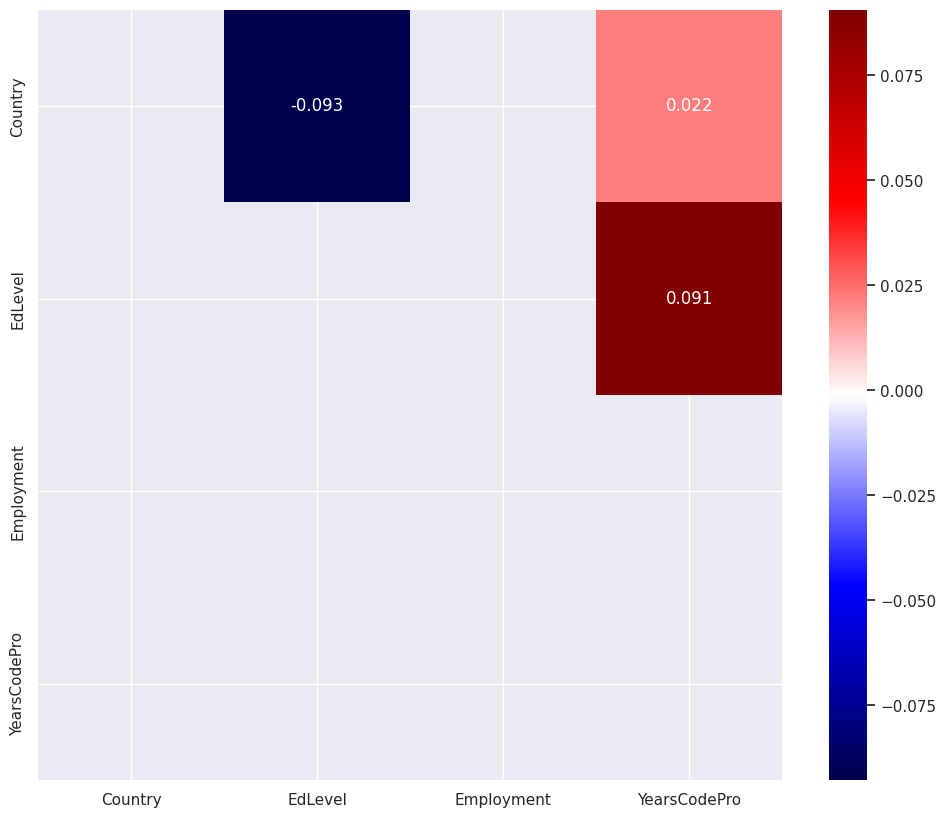

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

## **DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
decision_tree_reg.score(X_train, y_train)

0.6179503649393562

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = decision_tree_reg.predict(X_train)
y_test_pred = decision_tree_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 22647.597873711875
RMSE(Root Mean Squared Error) for testing set: 27125.14072672837

MSE(Mean Squared Error) for training set: 512913689.4493586
MSE(Mean Squared Error) for testing set: 735773259.444818

MAE(Mean Absolute Error) for training set: 16820.160728657196
MAE(Mean Absolute Error) for testing set: 20396.090995088765

R-squared for training set: 61.8%
R-squared for testing set: 45.43%


In [ ]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  10.027809071146287

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.208216278911454

The Mean Log of Mean Absolute Error on the Training dataset is:  9.730333489287299

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.92309854358345


In [ ]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U21')

In [ ]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

In [ ]:
y_sample = decision_tree_reg.predict(sample)

ValueError: could not convert string to float: 'Other'

In [ ]:
y_sample

NameError: name 'y_sample' is not defined

## **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
random_forest_reg.score(X_train, y_train)

0.6125787041110315

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = random_forest_reg.predict(X_train)
y_test_pred = random_forest_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 22806.256018849934
RMSE(Root Mean Squared Error) for testing set: 26232.994856866775

MSE(Mean Squared Error) for training set: 520125313.5973289
MSE(Mean Squared Error) for testing set: 688170019.1603986

MAE(Mean Absolute Error) for training set: 17236.21168622442
MAE(Mean Absolute Error) for testing set: 19901.329566616158

R-squared for training set: 61.260000000000005%
R-squared for testing set: 48.96%


In [ ]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  10.034790164097025

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.174773243120478

The Mean Log of Mean Absolute Error on the Training dataset is:  9.754767780293196

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.898541820873508


In [ ]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U21')

In [ ]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

ValueError: y contains previously unseen labels: 'United States'

In [ ]:
y_sample = random_forest_reg.predict(sample)

ValueError: could not convert string to float: 'United States'

In [ ]:
y_sample

NameError: name 'y_sample' is not defined

## **GridSearchCV (DecisionTreeRegressor)**

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gridSearchCV = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gridSearchCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [ ]:
regressor = gridSearchCV.best_estimator_
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [ ]:
regressor.score(X_train, y_train)

0.5369079457577657

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 24934.22736401759
RMSE(Root Mean Squared Error) for testing set: 25654.28484939542

MSE(Mean Squared Error) for training set: 621715694.2405237
MSE(Mean Squared Error) for testing set: 658142331.1339194

MAE(Mean Absolute Error) for training set: 19064.18128826607
MAE(Mean Absolute Error) for testing set: 19612.55652837709

R-squared for training set: 53.690000000000005%
R-squared for testing set: 51.190000000000005%


In [ ]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  10.123996731497243

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.1524658873062

The Mean Log of Mean Absolute Error on the Training dataset is:  9.8555665281892

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.88392527929983


In [ ]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U21')

In [ ]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

ValueError: y contains previously unseen labels: 'United States'

In [ ]:
y_pred_sample = regressor.predict(sample)
y_pred_sample

ValueError: could not convert string to float: 'United States'

## **LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_reg.score(X_train, y_train) #R-squared for training set

0.1539950117791189

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 33701.45975660397
RMSE(Root Mean Squared Error) for testing set: 33879.475104013894

MSE(Mean Squared Error) for training set: 1135788389.7259965
MSE(Mean Squared Error) for testing set: 1147818833.323497

MAE(Mean Absolute Error) for training set: 27653.825797275782
MAE(Mean Absolute Error) for testing set: 27945.192595157543

R-squared for training set: 15.4%
R-squared for testing set: 14.879999999999999%


In [ ]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  10.123996731497243

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.1524658873062

The Mean Log of Mean Absolute Error on the Training dataset is:  9.8555665281892

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.88392527929983


In [ ]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U21')

In [ ]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

ValueError: y contains previously unseen labels: 'United States'

In [ ]:
y_sample = linear_reg.predict(sample)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [ ]:
y_sample

NameError: name 'y_sample' is not defined

## **XGBRegressor**

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_reg.score(X_train, y_train)

0.5823364191010107

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mse_train = mean_squared_error(y_train, y_train_pred, squared=True)
mse_test = mean_squared_error(y_test, y_test_pred, squared=True)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE(Root Mean Squared Error) for training set:", rmse_train)
print("RMSE(Root Mean Squared Error) for testing set:", rmse_test)
print()
print("MSE(Mean Squared Error) for training set:", mse_train)
print("MSE(Mean Squared Error) for testing set:", mse_test)
print()
print("MAE(Mean Absolute Error) for training set:", mae_train)
print("MAE(Mean Absolute Error) for testing set:", mae_test)
print()
print(f"R-squared for training set: {round(r2_train, 4)*100}%")
print(f"R-squared for testing set: {round(r2_test, 4)*100}%")

RMSE(Root Mean Squared Error) for training set: 23679.665019250777
RMSE(Root Mean Squared Error) for testing set: 25216.212207939294

MSE(Mean Squared Error) for training set: 560726535.423929
MSE(Mean Squared Error) for testing set: 635857358.1158267

MAE(Mean Absolute Error) for training set: 17982.096295681094
MAE(Mean Absolute Error) for testing set: 19176.329855709457

R-squared for training set: 58.230000000000004%
R-squared for testing set: 52.839999999999996%


In [ ]:
import math
if mse_test <= 0:
    print('The Root Mean Squared Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Training dataset is: ', math.log(rmse_train))
print()
if mse_test <= 0:
    print('The Root Mean Squared Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(rmse_test))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Training dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Training dataset is: ', math.log(mae_train))
print()
if mse_test <= 0:
    print('The Mean Absolute Error on the Testing dataset is non-positive, so the logarithm is undefined.')
else:
    print('The Mean Log of Mean Absolute Error on the Testing dataset is: ', math.log(mae_test))

The Mean Log of Root Mean Squared Error on the Training dataset is:  10.07237194275138

The Mean Log of Root Mean Squared Error on the Testing dataset is:  10.135242408228924

The Mean Log of Mean Absolute Error on the Training dataset is:  9.797131891645556

The Mean Log of Mean Absolute Error on the Testing dataset is:  9.861431977453002


In [ ]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])
sample

array([['United States', 'Master’s degree', 'Full time', '15']],
      dtype='<U21')

In [ ]:
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

In [ ]:
# country, edlevel, employment, yearscode
import numpy as np
sample = np.array([["United States", 'Master’s degree', 'Full time', 15 ]])

# Get the classes the LabelEncoders were trained on
country_classes = le_country.classes_.tolist()
education_classes = le_education.classes_.tolist()
employment_classes = le_employment.classes_.tolist()

# Check if the sample values are in the known classes
# If not, replace them with a known value or handle them appropriately (e.g., impute, ignore)
if sample[0, 0] not in country_classes:
    # Replace with a placeholder or handle the unknown value
    # For this example, we'll replace with 'Other' if it exists in the classes
    sample[0, 0] = 'Other' if 'Other' in country_classes else country_classes[0]
    # Alternatively, you could impute with the most frequent value or handle it differently

if sample[0, 1] not in education_classes:
    sample[0, 1] = 'Less than a Bachelors' if 'Less than a Bachelors' in education_classes else education_classes[0]
    # Similarly, handle unknown values for education

if sample[0, 2] not in employment_classes:
    sample[0, 2] = 'No employment' if 'No employment' in employment_classes else employment_classes[0]
    # Similarly, handle unknown values for employment

# Now, transform using the LabelEncoders
sample[:, 0] = le_country.transform(sample[:, 0])
sample[:, 1] = le_education.transform(sample[:, 1])
sample[:, 2] = le_employment.transform(sample[:, 2])
sample = sample.astype(float)
print(sample)

In [ ]:
y_pred_sample = xgb_reg.predict(sample)
y_pred_sample

## **R2 Score Comparison of Different Regressors in the Training Set**

In [ ]:
import matplotlib.pyplot as plt
regressors = ['Decision Tree', 'Random Forest', 'GridSearchCV (Decision Tree)', 'Linear Regression', 'XGBoost']
r2_scores = [76, 75, 72, 26, 72]
plt.figure(figsize=(10, 6))
plt.bar(regressors, r2_scores, color=['blue', 'green', 'purple', 'red', 'orange'])
plt.xlabel('Regressors')
plt.ylabel('R2 Score of Training set (%)')
plt.title('R2 Score Comparison of Different Regressors')
plt.ylim(0, 100)
plt.xticks(rotation=15)
for i, score in enumerate(r2_scores):
    plt.text(i, score + 1, f'{score}%', ha='center')
plt.tight_layout()
plt.show()

## **R2 Score Comparison of Different Regressors in the Testing Set**

In [ ]:
import matplotlib.pyplot as plt
regressors = ['Decision Tree', 'Random Forest', 'GridSearchCV (Decision Tree)', 'Linear Regression', 'XGBoost']
r2_scores = [58, 63, 63, 26, 65]
plt.figure(figsize=(10, 6))
plt.bar(regressors, r2_scores, color=['blue', 'green', 'purple', 'red', 'orange'])
plt.xlabel('Regressors')
plt.ylabel('R2 Score of testing set (%)')
plt.title('R2 Score Comparison of Different Regressors')
plt.ylim(0, 100)
plt.xticks(rotation=15)
for i, score in enumerate(r2_scores):
    plt.text(i, score + 1, f'{score}%', ha='center')
plt.tight_layout()
plt.show()

## **Comparison of Log RMSE and Log MAE Scores for Different Regressiors in the Training Set**

In [ ]:
classifiers = ['Decision Tree', 'RandomForestRegressor', 'GridSearchCV (DecisionTreeRegressor)', 'LinearRegression', 'XGBRegressor']
mse_scores = [9.81, 9.83, 9.91, 10.37, 9.89]
mae_scores = [9.43, 9.50, 9.59, 10.17, 9.56]
plt.figure(figsize=(10, 7))
bar_width = 0.35
index = range(len(classifiers))
plt.bar(index, mse_scores, bar_width, label='RMSE', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], mae_scores, bar_width, label='MAE', color='g', alpha=0.7)
plt.xlabel('Regressors')
plt.ylabel('Log Error Scores')
plt.title('Comparison of Log RMSE and Log MAE Scores of Regressors in the training set')
plt.xticks([i + bar_width / 2 for i in index], classifiers, rotation=15)
plt.legend()
for i, mse, mae in zip(index, mse_scores, mae_scores):
    plt.text(i, mse + 0.1, f'{mse:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, mae + 0.1, f'{mae:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


## **Comparison of Log RMSE and Log MAE Scores for Different Regressiors in the Testing Set**

In [ ]:
classifiers = ['Decision Tree', 'RandomForestRegressor', 'GridSearchCV (DecisionTreeRegressor)', 'LinearRegression', 'XGBRegressor']
mse_scores = [10.09, 10.02, 10.03, 10.38, 10.00]
mae_scores = [9.75, 9.71, 9.70, 10.18, 9.67]
plt.figure(figsize=(10, 7))
bar_width = 0.35
index = range(len(classifiers))
plt.bar(index, mse_scores, bar_width, label='RMSE', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], mae_scores, bar_width, label='MAE', color='g', alpha=0.7)
plt.xlabel('Regressors')
plt.ylabel('Log Error Scores')
plt.title('Comparison of Log RMSE and Log MAE Scores of Regressors in the testing set')
plt.xticks([i + bar_width / 2 for i in index], classifiers, rotation=15)
plt.legend()
for i, mse, mae in zip(index, mse_scores, mae_scores):
    plt.text(i, mse + 0.1, f'{mse:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, mae + 0.1, f'{mae:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


## **Save Model**

In [ ]:
import pickle

In [ ]:
data = {"model": xgb_reg, "le_country": le_country, "le_education": le_education, "le_employment": le_employment}
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('salary_model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_education = data["le_employment"]

In [ ]:
y_pred = regressor_loaded.predict(sample)
y_pred

XGBoostError: [21:32:31] /workspace/src/c_api/../data/array_interface.h:499: Unicode-2 is not supported.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7d90df82dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x240651) [0x7d90df840651]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x53ebd9) [0x7d90dfb3ebd9]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0xbf) [0x7d90df73c79f]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7d9173689e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7d9173686493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7d91736af3e9]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7d91736aea00]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x57c88a0ceb4b]



In [ ]:
!pip install flask


In [ ]:
!pip install numpy pandas scikit-learn


In [ ]:
from flask import Flask, request, jsonify
import os


In [ ]:
import joblib
model = joblib.load('/content/salary_model.pkl')

In [ ]:
app=Flask(__name__)

In [ ]:
!pip install flask_ngrok

In [ ]:

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
  File "/usr/local/lib/python3.10/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -o - ipv4.icanhazip.com

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

In [ ]:
!streamlit run app.py

In [ ]:
import joblib  # Assuming you use joblib for model persistence
model = joblib.load('/content/salary_model.pkl')  # Replace with your model path


In [ ]:
!streamlit run app.py

In [ ]:
!cp /path/to/salary_model.pkl /content/salary_model.pkl